# _Optics_

In [1]:
$plotColor = ColorData[68,"ColorList"]

{Hue[0.55, 1, 0.7], Hue[0.06, 1, 0.9], Hue[0.25, 1, 0.55], Hue[0.11, 0.9, 0.85], 
 
>   Hue[0.5, 1, 0.5], Hue[0.2, 1, 0.7], Hue[0.08, 1, 0.7], Hue[0.5, 0.8, 0.75], 
 
>   Hue[0.45, 1, 0.5], Hue[0.6, 0.5, 0.9]}

## Standing Wave & Beat

wave1    wave2    average   modulation    velocity
   ω =4    ω =3.5    ω =3.75   ω =0.25      u =37.5
    1       2         a         m            p

   k =2    k =-1.8   k =0.1    k =1.9       u =0.131579
    1       2         a         m            g
-Graphics-
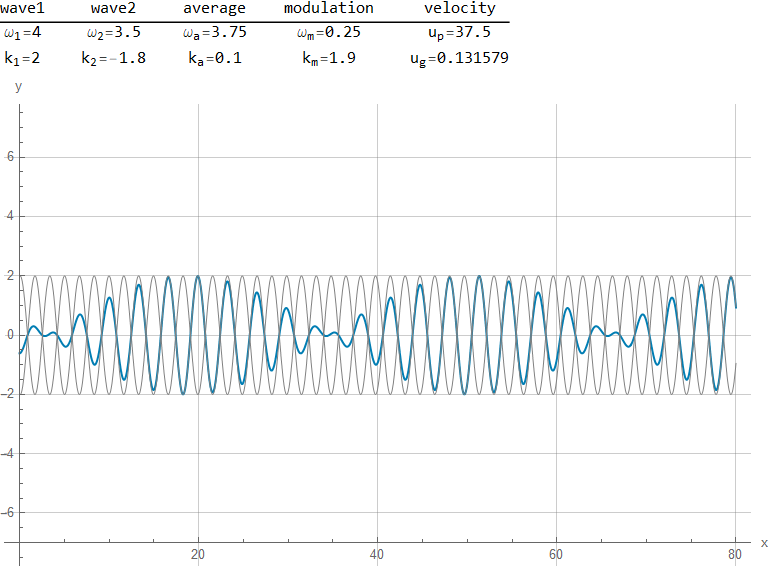

In [2]:
Module[
    {
        A = 1,
        ω1 = 4, ωa, ωm,
        k1 = 2, ka, km,
        up, ug,
        carrier, envelope, wave,
        info,
        range = {0,80}, envelopePlot, wavePlot, fig,
        output
    },
    
    ωa[ω2_] := (ω1+ω2)/2;
    ωm[ω2_] := (ω1-ω2)/2;
    
    ka[k2_] := (k1+k2)/2;
    km[k2_] := (k1-k2)/2;
    
    up[ω2_,k2_] := ωa[ω2] / ka[k2] //Quiet; 
    ug[ω2_,k2_] := ωm[ω2] / km[k2] //Quiet;
    
    carrier [x_,t_][ω2_,k2_] :=    Cos[ka[k2] x - ωa[ω2] t];
    envelope[x_,t_][ω2_,k2_] := 2A Cos[km[k2] x - ωm[ω2] t];
    wave[x_,t_][ω2_,k2_] := carrier[x,t][ω2,k2]*envelope[x,t][ω2,k2];
    
    info[ω2_,k2_] :=
        TableForm[
            {
                Row/@{{Subscript["ω",1],"=",ω1},{Subscript["ω",2],"=",ω2},{Subscript["ω","a"],"=",ωa[ω2]},{Subscript["ω","m"],"=",ωm[ω2]},{Subscript["u","p"],"=",up[ω2,k2]}},
                Row/@{{Subscript["k",1],"=",k1},{Subscript["k",2],"=",k2},{Subscript["k","a"],"=",ka[k2]},{Subscript["k","m"],"=",km[k2]},{Subscript["u","g"],"=",ug[ω2,k2]}}
            },
            TableHeadings->{None,{"wave1","wave2","average","modulation","velocity"}},
            TableAlignments->{Center,Automatic}
        ];
    
    envelopePlot[t_][ω2_,k2_] := 
        Plot[
            {
                 envelope[x,t][ω2,k2],
                -envelope[x,t][ω2,k2]
            },
            {x,range[[1]],range[[2]]}, 
            PlotStyle->Directive[Gray,Thickness@Small]
        ];
    wavePlot[t_][ω2_,k2_] := 
        Plot[
            wave[x,t][ω2,k2], 
            {x,range[[1]],range[[2]]}, 
            PlotStyle->{$plotColor[[1]],Thickness@Large}
        ];
    fig[t_][ω2_,k2_][showEnvelope_] := 
        Show[
            Module[{ plotList },
                plotList = { wavePlot[t][ω2,k2] };
                If[showEnvelope, 
                    AppendTo[plotList, envelopePlot[t][ω2,k2] ]
                ];
                plotList
            ],
            PlotRange->{{0,80},{-7,7}}, AxesOrigin->{0,-7},
            AxesLabel->{"x","y"}, GridLines->Automatic,
            ImageSize->Large
        ];
    
    output[t_][ω2_,k2_][showEnvelope_] := 
        Column@{
            info[ω2,k2],
            fig[t][ω2,k2][showEnvelope]
        };
    
    (* ---- static plot ---- *)(**)
    With[
        {
            ω2 = 3.5, k2 = -1.8,
            showEnvelope = True
        },
        output[0.3 * 2Pi / ωa[ω2]][ω2,k2][showEnvelope]
    ]
    (* ---- GIF ---- *)(*
    With[
        {
            ω2 = 3.5, k2 = -1.8,
            showEnvelope = True
        },
        Export["beat.gif",
            Table[
                output[t][ω2,k2][showEnvelope],
                {t,0,10,0.1}
            ],
            ImageResolution->96,
            "DisplayDurations"->1/15, AnimationRepetitions->Infinity
        ]
    ]*)
    (* ---- manipulate ---- *)(*
    WolframPlayer[#,"beat"]& @ Manipulate[
        output[t][ω2,If[k2reversed,-k2,k2]][showEnvelope]
        ,
        {{ω2          , ω1   , Subscript["ω",2]    }, ω1-0.5,ω1   },
        {{k2          , k1   , Subscript["k",2]    }, k1-0.3,k1   },
        {{k2reversed  , False, "direction reversed"}, {True,False}},
        {{showEnvelope, True , "show envelope"     }, {True,False}},
        {{t           , 0    , "t"                 }, 0,10, 
            Animator, 
            DefaultDuration->7,
            AnimationRepetitions->Infinity, AnimationRunning->False}
        ,
        TrackedSymbols->{ω2,k2,k2reversed,showEnvelope,t},
        ControlPlacement->Right,
        SaveDefinitions->True
    ]*)
]

## Polarized Wave

A
          o
θ=ArcTan[--]=45°
         A
          e
                 Pi             Pi
δ =0Spacer[20]δ =--Spacer[20]δ =--
 A             C 2            B 2
-Graphics3D-
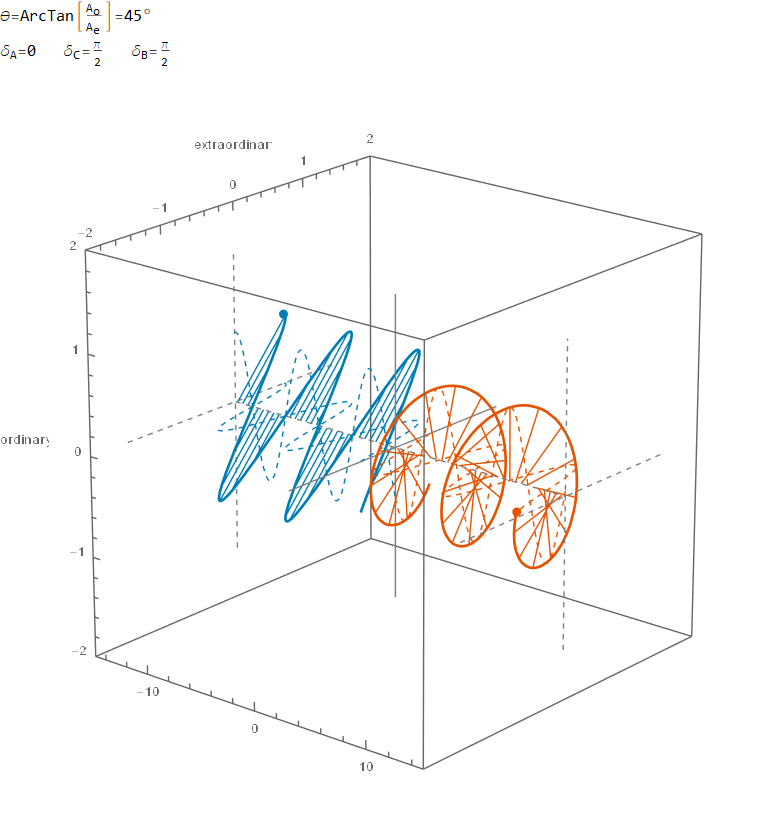

In [3]:
Module[
    {
        Ae, Ao,
        δB,
        e, o,
        info,
        xrange = 15, componentPlot, wavePlot, vectorPlot, fig,
        output
    },
    
    Ae[θ_] := Cos[θ Degree]; Ao[θ_] := Sin[θ Degree];
    
    δB[δA_,δC_] := δA + δC;
    
    e[x_,t_][δ_][θ_] := Ae[θ] Sin[x - t - δ];
    o[x_,t_]    [θ_] := Ao[θ] Sin[x - t    ];
    
    info[δA_,δC_][θ_] := 
        Column@{
            Row@{"θ=",ArcTan[Subscript["A","o"]/Subscript["A","e"]],"=",θ,"°"},
            Row@{
                Subscript["δ","A"],"=",δA, Spacer@20,
                Subscript["δ","C"],"=",δC, Spacer@20,
                Subscript["δ","B"],"=",δB[δA,δC]
            }
        };
    
    componentPlot[t_][δ_][θ_][range_,color_] := 
        ParametricPlot3D[
            {
                {x, e[x,t][δ][θ], 0        },
                {x, 0           , o[x,t][θ]}
            },
            {x,range[[1]],range[[2]]},
            PlotStyle->Directive[$plotColor[[color]],Thickness@Small,Dashed]
        ];
    wavePlot[t_][δ_][θ_][range_,color_] := 
        ParametricPlot3D[
            {x, e[x,t][δ][θ], o[x,t][θ]},
            {x,range[[1]],range[[2]]},
            PlotStyle->{$plotColor[[color]],Thickness@Large}
        ];
    vectorPlot[t_][δ_][θ_][range_,color_] :=
        Graphics3D[{
            Thickness@Tiny,
            $plotColor[[color]],
            Line[
                Table[
                    { {x, e[x,t][δ][θ], o[x,t][θ]}, {x,0,0} },
                    {x,range[[1]]+0.2,range[[2]],0.5}
                ]
            ]
        }];
    fig[t_][δA_,δC_][θ_][showComponent_,showVector_][azimuthal_,elevation_] :=
        Show[
            Module[{ plotList },
                plotList = {
                    Graphics3D@{
                        Thickness@Small,Gray,
                        (* polarizer *)
                        Line@{ {{0,-1.5,0},{0,1.5,0}}, {{0,0,-1.5},{0,0,1.5}} },
                        Dashed, Line@{
                            (* x axis *)
                            {{-xrange,0,0},{xrange,0,0}},
                            (* frames *)
                            {{-xrange,-1.5,0},{-xrange,1.5,0}}, {{-xrange,0,-1.5},{-xrange,0,1.5}},
                            {{ xrange,-1.5,0},{ xrange,1.5,0}}, {{ xrange,0,-1.5},{ xrange,0,1.5}}
                        },
                        (* end points of the two waves *)
                        PointSize[Large],
                        $plotColor[[1]], Point@{-xrange,e[-xrange,t][δA       ][θ],o[-xrange,t][θ]},
                        $plotColor[[2]], Point@{ xrange,e[ xrange,t][δB[δA,δC]][θ],o[ xrange,t][θ]}
                    },
                    (* waves *)
                    wavePlot[t][δA       ][θ][{-xrange,0},1],
                    wavePlot[t][δB[δA,δC]][θ][{0, xrange},2]
                };
                (* components *)
                If[showComponent,
                    AppendTo[plotList, componentPlot[t][δA       ][θ][{-xrange,0},1] ];
                    AppendTo[plotList, componentPlot[t][δB[δA,δC]][θ][{0, xrange},2] ]
                ];
                (* vectors *)
                If[showVector,
                    AppendTo[plotList, vectorPlot[t][δA       ][θ][{-xrange,0},1] ];
                    AppendTo[plotList, vectorPlot[t][δB[δA,δC]][θ][{0, xrange},2] ]
                ];
                plotList
            ],
            PlotRange->{{-xrange,xrange},{-2,2},{-2,2}}, BoxRatios->{1,1,1},
            Axes->True, AxesLabel->{"","extraordinary","ordinary"},
            ViewPoint->CoordinateTransform["Spherical"->"Cartesian",
                {10,(90-elevation)Degree,(azimuthal-90)Degree}],
            ImageSize->Large
        ];
    
    output[t_][δA_,δC_][θ_][showComponent_,showVector_][azimuthal_,elevation_] := 
        Column@{
            info[δA,δC][θ],
            fig[t][δA,δC][θ][showComponent,showVector][azimuthal,elevation]
        };
    
    (* ---- static plot ---- *)(**)
    With[
        {
            θ = 45,
            δA = 0, δC = Pi/2,
            showComponent = True, showVector = True,
            azimuthal = 40, elevation = 20
        },
        output[3Pi/4][δA,δC][θ][showComponent,showVector][azimuthal,elevation]
    ]
    (* ---- GIF ---- *)(*
    With[
        {
            θ = 45,
            δA = 0, δC = Pi/2,
            showComponent = True, showVector = True,
            azimuthal = 40, elevation = 20
        },
        Export["polar.gif",
            Table[
                output[t][δA,δC][θ][showComponent,showVector][azimuthal,elevation],
                {t,0,2Pi,0.1}
            ],
            ImageResolution->96,
            "DisplayDurations"->1/15, AnimationRepetitions->Infinity
        ]
    ]*)
    (* ---- manipulate ---- *)(*
    WolframPlayer[#,"polar"]& @ Manipulate[
        output[t][δA,δC][θ][showComponent,showVector][40,20]
        ,
        {{θ            , 90  , "θ (deg)"         }, 0,90,15     },
        {{δA           , 0   , Subscript["δ","A"]}, -Pi,Pi,Pi/8 },
        {{δC           , 0   , Subscript["δ","C"]}, -Pi,Pi,Pi/8 },
        {{showComponent, True, "show components" }, {True,False}},
        {{showVector   , True, "show vectors"    }, {True,False}},
      (*{{azimuthal    , 40  , "azimuthal"       }, 0,90        },*)
      (*{{elevation    , 20  , "elevation"       }, 0,90        },*)
        {{t            , 0   , "t"               }, 0,2Pi, 
            Animator,
            AnimationRepetitions->Infinity, AnimationRunning->False}
        ,
        TrackedSymbols->{θ,δA,δC,showComponent,showVector,t},
        ControlPlacement->Right,
        SaveDefinitions->True
    ]*)
]